# Introduction

In [1]:
# Importations

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme() 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import model_selection
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [2]:
# Upload 2 files train & test

train = pd.read_csv ('../input/train.csv',
                          sep=',', header=0, index_col=1,error_bad_lines=False)


valid = pd.read_csv ('../input/test.csv',
                          sep=',', header=0, index_col=1,error_bad_lines=False)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#region='France'
region='{{cookiecutter.region}}'

In [4]:
train.info()
#train=train[train['region']=='France']
train=train[train['region']==region]
train.drop(['region'],axis=1,inplace=True)
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    891 non-null    object 
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Name      891 non-null    object 
 4   Sex       891 non-null    object 
 5   Age       714 non-null    float64
 6   SibSp     891 non-null    int64  
 7   Parch     891 non-null    int64  
 8   Ticket    891 non-null    object 
 9   Fare      891 non-null    float64
 10  Cabin     204 non-null    object 
 11  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [5]:
valid.info()
#valid=valid[valid['region']=='France']
valid=valid[valid['region']==region]
valid.drop(['region'],axis=1,inplace=True)
valid.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    418 non-null    object 
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 39.2+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S
904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S


In [6]:
# We can see some missing values in both files


In [7]:
# We concatenate train and valid

train['df']='train'
valid['df']='valid'

df = pd.concat([train,valid] , axis=0)


In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  297 non-null    float64
 1   Pclass    437 non-null    int64  
 2   Name      437 non-null    object 
 3   Sex       437 non-null    object 
 4   Age       353 non-null    float64
 5   SibSp     437 non-null    int64  
 6   Parch     437 non-null    int64  
 7   Ticket    437 non-null    object 
 8   Fare      437 non-null    float64
 9   Cabin     90 non-null     object 
 10  Embarked  437 non-null    object 
 11  df        437 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 44.4+ KB


In [9]:

# We cand drop 3 features : Cabin,Name and Ticket

df = df.drop(['Cabin', 'Name','Ticket'], axis=1)

# Statistiques

In [10]:
# NUM

num_col=['Age','Fare']
for col in num_col :  
    print(col, ":", df[col].describe())


Age : count    353.000000
mean      30.333314
std       14.728022
min        0.170000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Fare : count    437.000000
mean      32.162452
std       49.878493
min        0.000000
25%        7.895800
50%       13.000000
75%       27.900000
max      512.329200
Name: Fare, dtype: float64


In [11]:
# CAT

for col in df.columns : 
    if col not in num_col : 
        print(col, ":", df[col].value_counts())

Survived : 0.0    184
1.0    113
Name: Survived, dtype: int64
Pclass : 3    246
2     96
1     95
Name: Pclass, dtype: int64
Sex : male      268
female    169
Name: Sex, dtype: int64
SibSp : 0    310
1     98
2     12
8      7
3      6
4      3
5      1
Name: SibSp, dtype: int64
Parch : 0    348
2     42
1     35
4      5
3      3
5      2
6      1
9      1
Name: Parch, dtype: int64
Embarked : S    310
C     85
Q     42
Name: Embarked, dtype: int64
df : train    297
valid    140
Name: df, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  297 non-null    float64
 1   Pclass    437 non-null    int64  
 2   Sex       437 non-null    object 
 3   Age       353 non-null    float64
 4   SibSp     437 non-null    int64  
 5   Parch     437 non-null    int64  
 6   Fare      437 non-null    float64
 7   Embarked  437 non-null    object 
 8   df        437 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 34.1+ KB


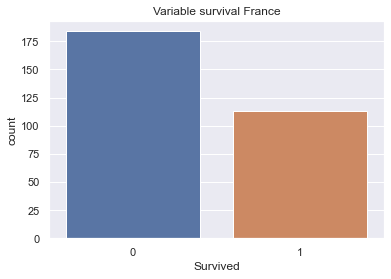

In [13]:
p=sns.countplot(x='Survived',  data=train)
p.set(title = "Variable survival "+region)
plt.gcf().savefig('../../../output/survival.png')
plt.show(block=False)

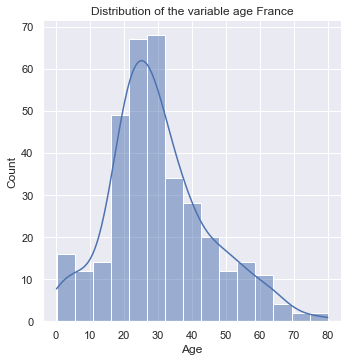

In [14]:
# Distribution of Age

p=sns.displot(df['Age'], bins=15, kind='hist', kde=1)
p.set(title = "Distribution of the variable age "+region)
plt.gcf().savefig('../../../output/age_hist.png')
plt.show(block=False)

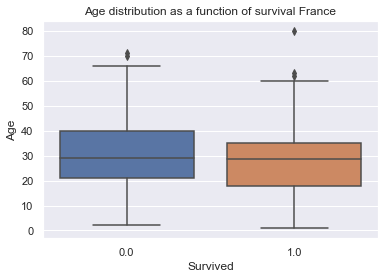

In [15]:

p=sns.boxplot( y='Age', x='Survived', data=df)
p.set(title = "Age distribution as a function of survival "+region)
plt.gcf().savefig('../../../output/age_survival.png')
plt.show(block=False)

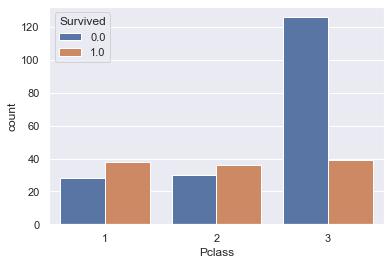

In [16]:
sns.countplot(x='Pclass', hue='Survived', data=df)
p.set(title = "Crossing between class and survival "+region)
plt.gcf().savefig('../../../output/class_survival.png')
plt.show(block=False)

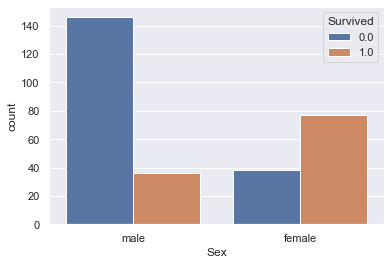

In [17]:
sns.countplot(x='Sex', hue='Survived', data=df)
p.set(title = "Cross between gender and survival "+region)
plt.gcf().savefig('../../../output/gender_survival.png')
plt.show(block=False)

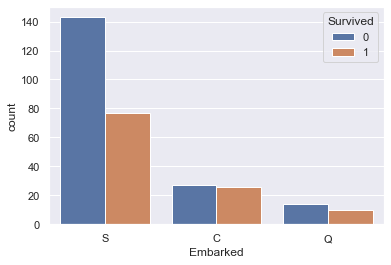

In [18]:
sns.countplot(x='Embarked', hue='Survived', data=train)
p.set(title = "Crossing between embarkation and survival "+region)
plt.gcf().savefig('../../../output/embark_survival.png')
plt.show(block=False)

# Preprocessing

In [19]:
# Fill missing values : 

# AGE : on remplace par la moyenne
df['Age'].replace( { np.NaN : df['Age'].median() } , inplace=True)


# EMBARKED : par le mode
df['Embarked'].replace( { np.NaN :df['Embarked'].mode()[0] } , inplace=True)


# Fare : moyenne
df['Fare'].replace( { np.NaN : df['Fare'].median() } , inplace=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  297 non-null    float64
 1   Pclass    437 non-null    int64  
 2   Sex       437 non-null    object 
 3   Age       437 non-null    float64
 4   SibSp     437 non-null    int64  
 5   Parch     437 non-null    int64  
 6   Fare      437 non-null    float64
 7   Embarked  437 non-null    object 
 8   df        437 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 50.3+ KB


In [21]:
# Get Dummy

df_discret = pd.get_dummies(data = df )

df_discret.shape

(437, 13)

In [22]:
df_discret.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,df_train,df_valid
PassengerId,,,,,,,,,,,,,
1,0.0,3,22.0,1,0,7.2500,0,1,0,0,1,1,0
4,1.0,1,35.0,1,0,53.1000,1,0,0,0,1,1,0
7,0.0,1,54.0,0,0,51.8625,0,1,0,0,1,1,0
10,1.0,2,14.0,1,0,30.0708,1,0,1,0,0,1,0
13,0.0,3,20.0,0,0,8.0500,0,1,0,0,1,1,0


In [23]:
# We split the 2 dataframes


train2 = df_discret[df_discret['df_train']==1]
valid2 = df_discret[df_discret['df_valid']==1]


print(train2.shape)
print(valid2.shape)

(297, 13)
(140, 13)


In [24]:
# We drop these columns


train2 = train2.drop(['df_train', 'df_valid'], axis=1)

valid2 = valid2.drop(['df_train', 'df_valid','Survived'], axis=1)

In [25]:
# Train test split

target = train2['Survived']
features= train2.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target,stratify=target, test_size = 0.2, random_state=50)


In [26]:
# StandardScaler

scaler= StandardScaler()

X_train_scaled  = scaler.fit_transform (X_train)

X_test_scaled = scaler.transform ( X_test)

valid_scaled = scaler.transform ( valid2)

# Creation of 4 models


In [27]:
# Logistic Regression

clf_lr= LogisticRegression().fit(X_train_scaled,y_train)

y_pred_test_lr = clf_lr.predict(X_test_scaled)


print("Results on test")
print(pd.crosstab(y_test, y_pred_test_lr, rownames=['Truth'], colnames=['Prediction']))
print (classification_report(y_test, y_pred_test_lr))


Results on test
Prediction  0.0  1.0
Truth               
0.0          32    5
1.0           6   17
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85        37
         1.0       0.77      0.74      0.76        23

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60



In [28]:
# KNN (5 Neighbors)

knn =  neighbors.KNeighborsClassifier()

knn.fit(X_train_scaled,y_train)

y_pred_test_knn = knn.predict(X_test_scaled)

print("Results on test")
print(pd.crosstab(y_test, y_pred_test_knn, rownames=['Truth'], colnames=['Prediction']))
print (classification_report(y_test, y_pred_test_knn))

Results on test
Prediction  0.0  1.0
Truth               
0.0          32    5
1.0           6   17
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85        37
         1.0       0.77      0.74      0.76        23

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60



In [29]:
# Random Forest (100 trees)
 
rf = ensemble.RandomForestClassifier()

rf.fit(X_train_scaled,y_train)

y_pred_test_rf = rf.predict(X_test_scaled)

print("Results on test")
print(pd.crosstab(y_test, y_pred_test_rf, rownames=['Truth'], colnames=['Prediction']))
print (classification_report(y_test, y_pred_test_rf))


Results on test
Prediction  0.0  1.0
Truth               
0.0          31    6
1.0           6   17
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        37
         1.0       0.74      0.74      0.74        23

    accuracy                           0.80        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



In [30]:
# GradientBoostingClassifier ( 100 estimators)

clf = GradientBoostingClassifier()

clf.fit(X_train_scaled,y_train)

y_pred_test_gbc = clf.predict(X_test_scaled)

print("Results on test")
print(pd.crosstab(y_test, y_pred_test_gbc, rownames=['Truth'], colnames=['Prediction']))
print (classification_report(y_test, y_pred_test_gbc))


Results on test
Prediction  0.0  1.0
Truth               
0.0          32    5
1.0           6   17
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85        37
         1.0       0.77      0.74      0.76        23

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60



In [31]:
# Maybe we can improve the performance with a Voting classifier combining  the 4 models


vc = VotingClassifier([('lr', clf_lr),('knn', knn), ('rf', rf), ('clf', clf)])

vc.fit(X_train_scaled,y_train)

y_pred_test_vc = vc.predict(X_test_scaled)

print(pd.crosstab(y_test, y_pred_test_vc, rownames=['Truth'], colnames=['Prediction']))
print (classification_report(y_test, y_pred_test_vc))

Prediction  0.0  1.0
Truth               
0.0          33    4
1.0           6   17
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        37
         1.0       0.81      0.74      0.77        23

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



# Conclusion

In [32]:

print("Score - régression logistique :",clf_lr.score(X_test_scaled, y_test))
print("Score - KNN :",knn.score(X_test_scaled, y_test))
print("Score - random forest :",rf.score(X_test_scaled, y_test))
print("Score - gradient boosting classifier:",clf.score(X_test_scaled, y_test))
print("Score - voting classifier :",vc.score(X_test_scaled, y_test))




Score - régression logistique : 0.8166666666666667
Score - KNN : 0.8166666666666667
Score - random forest : 0.8
Score - gradient boosting classifier: 0.8166666666666667
Score - voting classifier : 0.8333333333333334


# Kaggle Submission 

In [33]:
prediction_final = vc.predict(valid_scaled)
valid2['Survived']=prediction_final
valid2['Survived']=valid2['Survived'].astype('int64')
valid2=valid2.reset_index()


submission = pd.DataFrame({'PassengerId':valid2['PassengerId'],'Survived':valid2['Survived']})

import datetime;
  
# ct stores current time
ct = datetime.datetime.now()

ct=str(ct)

ct=ct.replace(' ','_')
ct=ct.replace('.','_')
ct=ct.replace(':','_')


import os

path = '../output/'+region

# Check whether the specified path exists or not
isExist = os.path.exists(path)

if not isExist:
  
  # Create a new directory because it does not exist 
  os.makedirs(path)
  print("The new directory is created!")

#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = path+'/Titanic Predictions vc '+str(ct)+'.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)



The new directory is created!
Saved file: ../output/France/Titanic Predictions vc 2022-03-30_02_49_41_882956.csv


In [34]:
valid2['region']=region
valid2.to_csv('../../../output/output.csv',index=False)